In [ ]:
!pip install xgboost
import numpy as np
import pandas as pd
import librosa
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tqdm

In [ ]:
X = np.load('X_esc50.npy')
y = np.load('y_esc50.npy')
X=pd.DataFrame(X)
y=pd.DataFrame(y)

print("Shapes:", X.shape, y.shape)

Shapes: (2000, 96) (2000, 1)


In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-309.665283,53.366669,-96.699112,-48.618431,-9.306359,-22.434950,-3.349211,9.383682,9.338669,5.012778,...,0.194008,0.289957,0.749597,0.776781,0.275400,0.256088,2183.100351,1847.314267,0.147487,0.093241
1,-193.978195,2.746148,-59.386883,4.413461,-47.953033,-28.069557,-30.951284,-6.770310,-38.149338,-14.319889,...,0.353666,0.408024,0.492726,0.312741,0.212306,0.206644,3859.360212,2255.062495,0.303512,0.049820
2,16.259264,56.921246,-8.960626,15.122985,-12.898559,12.127984,2.215822,6.596192,5.509498,-6.237866,...,0.098187,0.102726,0.098363,0.106672,0.106328,0.132369,3429.941072,2756.101415,0.385365,0.270203
3,17.771097,54.864990,-7.179326,13.654805,-9.484007,12.623292,3.337097,5.043445,4.438000,-5.721358,...,0.117495,0.120636,0.129463,0.129512,0.124962,0.131480,3508.560555,2837.942476,0.386870,0.274092
4,-423.075226,124.929817,38.760689,35.040859,-2.481526,8.447441,-12.521978,4.315353,-1.318659,-9.173830,...,0.428511,0.406402,0.559642,0.701100,0.602875,0.628998,1457.273056,2209.732057,0.045898,0.008937


In [ ]:
data_df = X.copy()
data_df['label'] = y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='gpu_hist'
)

model.fit(X_train, y_train_enc)




print("Training complete.")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Training complete.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)
acc = accuracy_score(y_test_enc, y_pred)

print(f"xgboost Accuracy: {acc:.4f}")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_preds)
print(f"SVC Accuracy: {svc_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:41] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


xgboost Accuracy: 0.6350
                  precision    recall  f1-score   support

        airplane       0.67      0.75      0.71         8
       breathing       0.38      0.38      0.38         8
  brushing_teeth       0.75      0.75      0.75         8
     can_opening       1.00      0.50      0.67         8
        car_horn       0.83      0.62      0.71         8
             cat       0.56      0.62      0.59         8
        chainsaw       0.75      0.75      0.75         8
  chirping_birds       0.71      0.62      0.67         8
    church_bells       0.75      0.75      0.75         8
        clapping       0.86      0.75      0.80         8
     clock_alarm       0.78      0.88      0.82         8
      clock_tick       0.11      0.12      0.12         8
        coughing       0.57      0.50      0.53         8
             cow       0.71      0.62      0.67         8
  crackling_fire       0.83      0.62      0.71         8
        crickets       1.00      0.75      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Accuracy: 0.1200


In [ ]:
results = pd.DataFrame({
    "Model": ["KNN", "SVC", "XGBoost"],
    "Accuracy": [knn_acc, svc_acc, acc]
})
print(results)


     Model  Accuracy
0      KNN     0.160
1      SVC     0.120
2  XGBoost     0.635


<ipython-input-10-3cc29d68f938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")


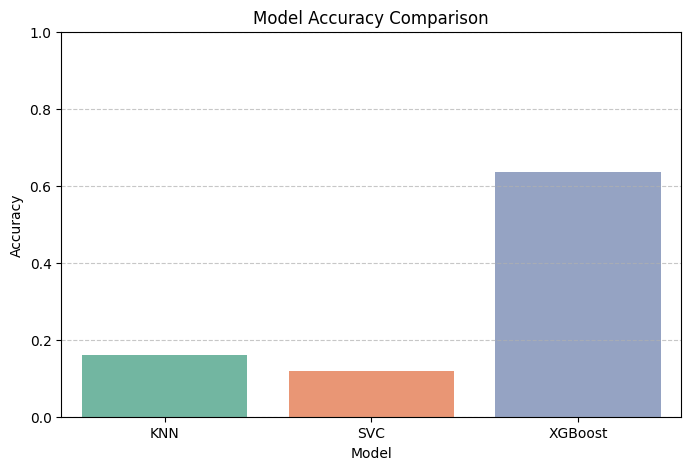

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

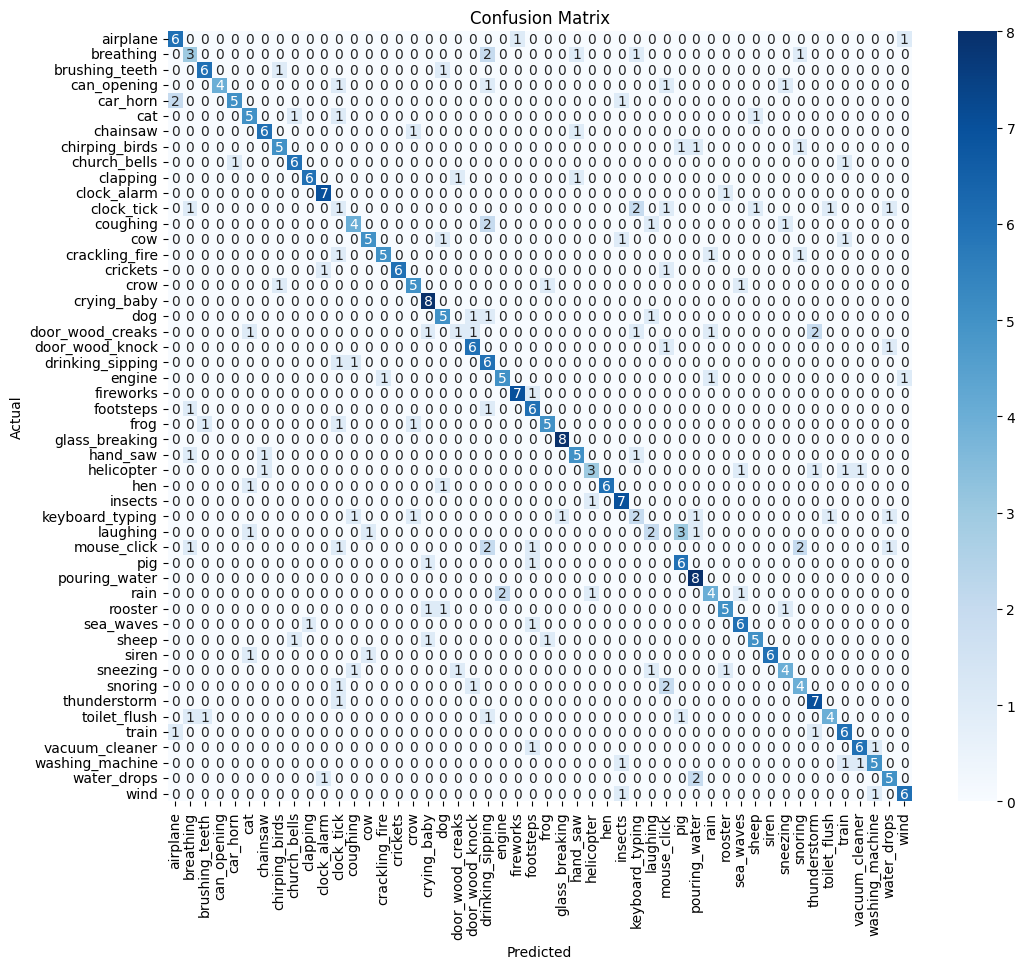

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


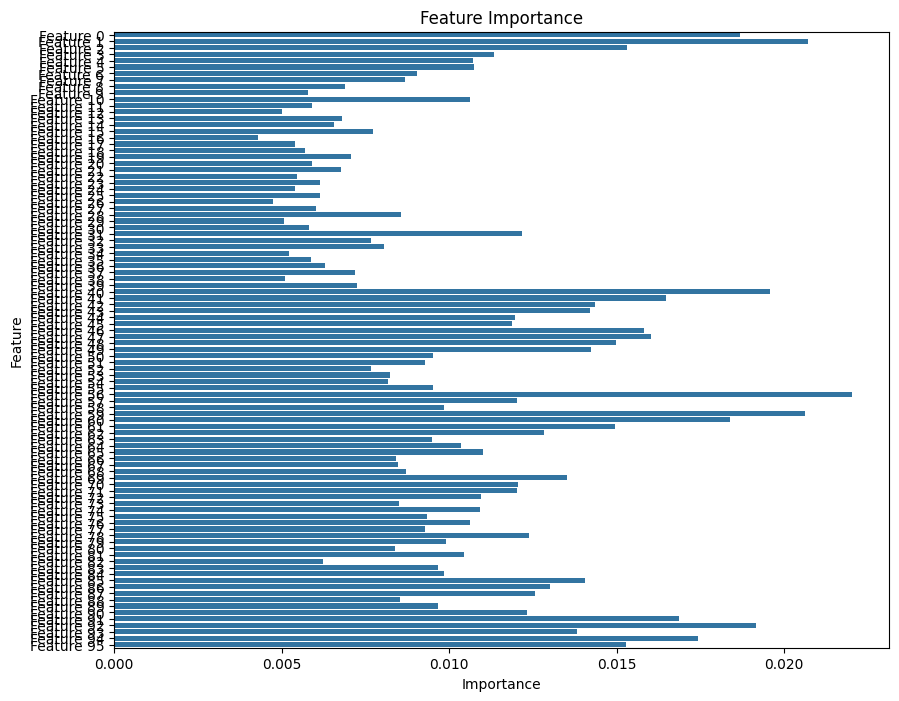

In [ ]:
importances = model.feature_importances_


plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=[f'Feature {i}' for i in range(X_train.shape[1])])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
